In [1]:
import numpy as np
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


train.csv shape is  (139753, 9)
test.csv shape is  (17470, 2)

        Id   ProductId          UserId  HelpfulnessNumerator  \
0   195370  1890228583  A3VLX5Z090RQ0V                     1   
1  1632470  B00BEIYSL4   AUDXDMFM49NGY                     0   
2     9771  0767809335  A3LFIA97BUU5IE                     3   
3   218855  6300215792  A1QZM75342ZQVQ                     1   
4   936225  B000B5XOZW   ANM2SCEUL3WL1                     1   

   HelpfulnessDenominator        Time  \
0                       2  1030838400   
1                       1  1405036800   
2                      36   983750400   
3                       1  1394841600   
4                       1  1163721600   

                                             Summary  \
0                        An Unexplained Anime Review   
1                                         not great.   
2                    Technical problem with this DVD   
3                          Heeeeyyyyy LAAAAADEEE!!!!   
4  Herzog the Great Trave

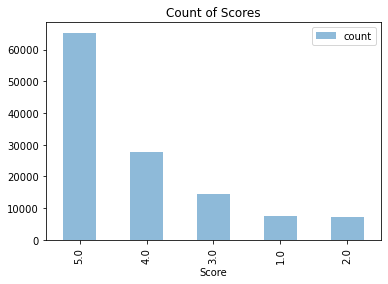

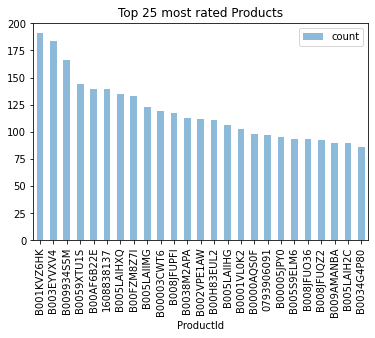

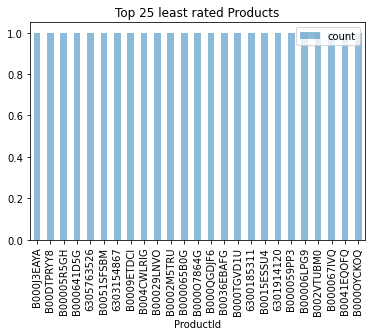

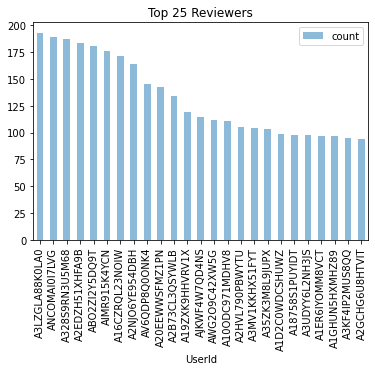

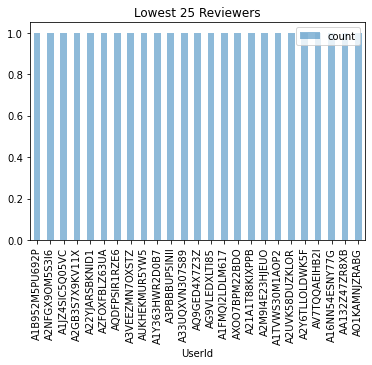

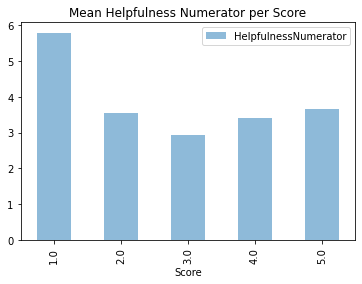

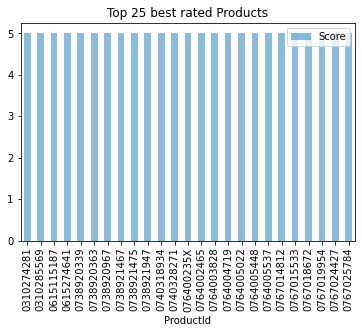

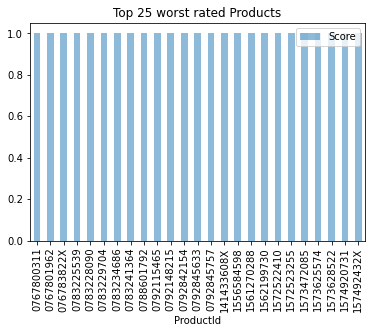

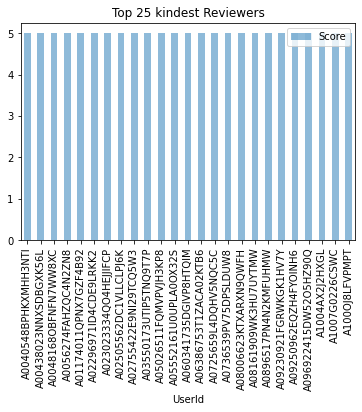

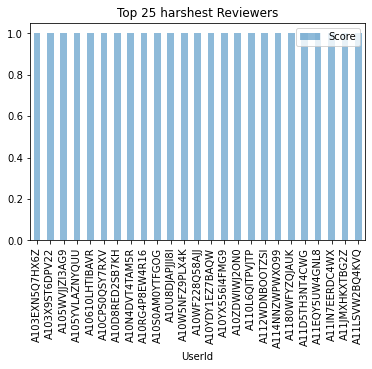

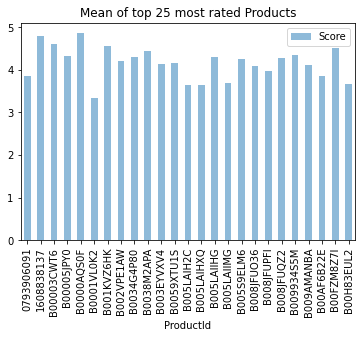

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

trainingSet = pd.read_csv("./data/train.csv")
testingSet = pd.read_csv("./data/test.csv")

print("train.csv shape is ", trainingSet.shape)
print("test.csv shape is ", testingSet.shape)

print()

print(trainingSet.head())
print()
print(testingSet.head())

print()

print(trainingSet.describe())

trainingSet['Score'].value_counts().plot(kind='bar', legend=True, alpha=.5)
plt.title("Count of Scores")
plt.show()

trainingSet['ProductId'].value_counts().nlargest(25).plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 most rated Products")
plt.show()

trainingSet['ProductId'].value_counts().nsmallest(25).plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 least rated Products")
plt.show()

trainingSet['UserId'].value_counts().nlargest(25).plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 Reviewers")
plt.show()

trainingSet['UserId'].value_counts().nsmallest(25).plot(kind='bar', legend=True, alpha=.5)
plt.title("Lowest 25 Reviewers")
plt.show()

trainingSet[['Score', 'HelpfulnessNumerator']].groupby('Score').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title("Mean Helpfulness Numerator per Score")
plt.show()

trainingSet[['Score', 'ProductId']].groupby('ProductId').mean().nlargest(25, 'Score').plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 best rated Products")
plt.show()

trainingSet[['Score', 'ProductId']].groupby('ProductId').mean().nsmallest(25, 'Score').plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 worst rated Products")
plt.show()

trainingSet[['Score', 'UserId']].groupby('UserId').mean().nlargest(25, 'Score').plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 kindest Reviewers")
plt.show()

trainingSet[['Score', 'UserId']].groupby('UserId').mean().nsmallest(25, 'Score').plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 harshest Reviewers")
plt.show()

trainingSet[trainingSet['ProductId'].isin(trainingSet['ProductId'].value_counts().nlargest(25).index.tolist())][['Score', 'ProductId']].groupby('ProductId').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title("Mean of top 25 most rated Products")
plt.show()

In [3]:
print(len(trainingSet['UserId'].unique()))
print(len(trainingSet['ProductId'].unique()))
selected_row = trainingSet[trainingSet['ProductId'] == "1890228583"]
summary = selected_row['Summary']
print(summary)

65269
34026
0                            An Unexplained Anime Review
1327      A very nice OVA with a somewhat familiar story
96196                                  A Little Too Much
118287                            Director's Cut version
Name: Summary, dtype: object


In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import  WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re

lemmatizer = WordNetLemmatizer()
def preprocess(text):
    text = str(text)
    words = word_tokenize(text)
    words = [word.lower() for word in words if word.isalnum()]
    words = [word for word in words if word not in stopwords.words('english')]
    words = [lemmatizer.lemmatize(word) for word in words]
    words = " ".join(words)
    return words
    

In [146]:
trainX = pd.read_csv('data/X_train.csv')
testX = pd.read_csv('data/X_test.csv')

In [115]:
import re
def preprocess_2(text):
    text = str(text)
    text = re.sub(r'[0-9]', "", text)
    return text

In [147]:
trainX['Summary'] = trainX['Summary'].apply(preprocess_2)
trainX['Text'] = trainX['Text'].apply(preprocess_2)

In [148]:
trainX['Score'].value_counts()

Score
5.0    65313
4.0    27818
3.0    14482
1.0     7361
2.0     7309
Name: count, dtype: int64

In [16]:
def load_glove_embeddings(file_path):
    embeddings = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.strip().split()
            word = values[0]
            try:
                vector = np.asarray(values[1:], dtype='float32')
                embeddings[word] = vector
            except ValueError:
                # Handle the case when the line cannot be converted to a vector
                print(f"Skipping line: {line}")
    return embeddings

In [17]:
glove_model = load_glove_embeddings('glove/glove.840B.300d.txt')

Skipping line: . . . -0.1573 -0.29517 0.30453 -0.54773 0.098293 -0.1776 0.21662 0.19261 -0.21101 0.53788 -0.047755 0.40675 0.023592 -0.32814 0.046858 0.19367 0.25565 -0.021019 -0.15957 -0.1023 0.20303 -0.043333 0.11618 -0.18486 0.0011948 -0.052301 0.34587 0.052335 0.16774 -0.21384 0.055947 0.24934 -0.12179 0.16749 0.28922 -0.033739 0.3015 -0.13241 0.092635 0.37155 -0.2884 -0.0052731 -0.001005 -0.51153 -0.28476 -0.20139 0.11837 -0.0055891 0.43604 0.16796 -0.2701 0.063957 -0.093253 -0.22079 0.36501 0.06545 0.23941 -0.19292 0.098293 0.12172 -0.1168 -0.027436 0.20507 -0.39139 -0.23111 0.46239 0.22888 -0.028415 -0.1798 0.23817 0.28093 -0.47935 0.23177 -0.35587 0.14246 0.11861 0.011018 0.091986 0.0054809 -0.39955 -0.40183 -0.10629 -0.30851 0.12383 -0.16737 -0.43569 0.4211 -0.57416 -0.19964 0.51312 0.090747 -0.21657 0.043519 0.24288 0.081134 0.49104 -0.33342 -0.31056 -0.3136 0.26931 -0.14402 0.33185 -0.21662 -0.072985 0.080603 -0.7266 -0.098385 -0.36233 -0.25346 0.1154 0.25738 0.15802 -0.1563

Skipping line: . . 0.035974 -0.024421 0.71402 -0.61127 0.012771 -0.11201 0.16847 -0.14069 -0.053491 -0.87539 -0.13959 0.29731 0.072308 -0.084514 -0.1879 0.12358 0.37639 -0.39238 -0.01111 -0.04924 0.63649 0.058814 0.19076 -0.20828 -0.11036 0.14934 0.24667 -0.39438 0.22853 -0.11201 0.33539 -0.32929 -0.049727 -0.090764 0.29095 0.27504 0.22802 -0.15616 0.37302 0.3752 -0.3677 0.1518 -0.27551 -0.63281 -0.31298 -0.22441 -0.15435 -0.64802 0.28404 0.12356 0.0034255 0.03094 0.35345 -0.46781 0.59203 -0.17966 0.27702 -0.46738 0.19438 0.21939 -0.36743 -0.084781 0.03253 -0.51323 -0.55466 0.49585 0.066985 0.47906 -0.25118 0.011123 0.15605 -1.0761 0.60875 -0.15764 0.066122 0.12779 -0.089209 0.4311 0.045732 -0.29364 -0.19994 -0.065952 0.26236 0.34039 -0.4956 -0.41187 0.055566 -0.69902 -0.057696 0.76519 0.2018 -0.34497 -0.22707 0.34316 -0.16098 0.42469 0.0080257 -0.33017 -0.43485 0.23581 -0.71085 0.27985 -0.31261 -0.012817 0.48305 -0.75151 -0.02347 -0.39653 -0.86857 0.2877 0.26678 0.22291 -0.1736 -0.127

Skipping line: contact name@domain.com 0.016426 0.13728 0.18781 0.75784 0.44012 0.096794 0.060987 0.31293 -0.15884 -1.2367 0.43769 0.10465 0.048858 -0.23182 0.71125 0.022376 0.63524 -1.4974 0.12243 -0.07386 -0.021514 -0.37652 0.17503 -0.011225 -0.12668 -0.0090601 0.38418 0.11132 0.15851 -0.47498 0.33619 -0.48833 0.23423 0.13258 0.29362 0.13526 -0.05115 -0.0055236 0.27734 -0.23565 0.19571 -0.29095 0.062419 -0.47502 -0.71402 -0.36384 0.53562 0.40136 0.30963 0.16238 -0.11662 -0.16201 0.30672 0.21663 0.086839 -0.38895 -0.19644 -0.52311 -0.33153 0.27012 -0.89654 -0.15193 0.12447 -0.19112 -0.494 -0.011873 -0.41412 0.52585 0.27316 -0.047525 -0.1178 -0.3371 0.61151 -0.012169 0.36935 0.32679 -0.098269 0.038729 0.003551 -0.51871 -0.48189 -0.079238 -0.34291 -0.44045 -0.24479 0.05593 0.83227 -0.55939 -0.29242 -0.19718 0.17693 -0.12205 0.55837 -0.28505 -0.64676 0.57716 -1.4398 0.066288 -0.086048 0.381 -0.25805 -0.11941 -0.25664 -0.057845 1.0033 -1.0863 0.14343 0.17181 -0.81313 0.19286 0.12922 -0.20

Skipping line: by name@domain.com 0.6882 -0.36436 0.62079 1.1482 -0.055475 -0.37936 0.0064471 -0.33046 -0.43406 -1.3468 0.70312 -0.41314 -0.65868 0.64324 0.13018 0.65846 0.86269 -0.93108 0.3476 0.73912 -0.51405 -0.15113 0.27331 0.51396 -0.74688 0.87989 -0.11887 0.3641 0.37838 0.36177 -0.45182 0.16173 -0.36353 -0.55643 -1.1186 0.70117 -0.48075 0.074095 0.43022 0.4625 0.011133 0.030287 -0.73342 -0.772 0.31058 0.022106 -0.16845 -0.70695 -0.16243 -0.15454 -0.12034 0.018702 0.51626 -0.17255 0.37335 -0.059377 0.013126 -0.30727 0.1581 0.74527 -0.7927 -0.34603 -0.01438 -1.055 -0.95074 -0.81794 0.27925 -0.35405 -0.26783 -0.30391 0.16093 -0.064806 0.69283 -1.1955 0.18414 -0.71183 0.062622 -0.62435 -0.16458 -0.74362 -0.19251 -0.1841 0.99035 -0.20552 -0.46621 0.98506 1.4113 0.024391 -0.14285 0.40063 0.10516 0.065123 -0.4613 0.27429 0.022191 0.55307 0.18442 -0.22378 -0.50433 0.046039 0.12306 -0.11203 -0.30851 -0.13275 -0.36831 -0.63785 -0.99149 -0.55833 0.17128 0.27324 -0.37803 0.4641 0.39427 0.048

Skipping line: at  name@domain.com 0.44321 -0.40005 -0.20065 1.1209 0.34041 0.086082 -0.067128 0.0022702 -0.94649 -1.4669 0.61248 0.34827 -0.20983 -0.61434 0.41102 0.57759 0.69071 -1.9301 0.75265 -0.13238 0.22003 0.28856 0.35234 0.45989 -0.21944 0.1931 -0.11664 0.14996 0.70354 -0.039238 0.55298 -0.53503 -0.3221 -0.28595 -0.1246 0.054544 -0.45937 0.1447 0.8203 -0.33182 0.10864 -0.56552 0.39898 -0.65012 -0.20285 0.11557 0.35711 -0.23958 -0.30281 0.51593 0.71883 -0.30403 0.59458 -0.3217 -0.23967 -0.2576 -0.50224 -0.36055 -0.71763 0.4981 -0.69945 -0.0072578 0.37327 -0.029839 -0.42705 0.93128 -0.046928 0.045162 -0.44879 0.16579 -0.26272 -0.35286 0.17395 -0.24436 -0.1439 -0.39857 0.25342 -0.44737 0.37618 -0.80252 -0.87776 -0.19282 -0.48746 0.065159 -0.24349 -0.77669 0.81629 -0.043888 -0.68276 -0.15709 -0.46533 -0.066009 0.063028 0.090332 -0.81297 0.88979 -0.6391 0.17351 0.3328 -0.30808 0.46158 -0.11289 -0.0261 -0.089243 0.37318 -0.73511 0.19798 -0.060219 -0.12113 -0.2146 0.62061 0.34296 0.89

In [18]:
def get_word_embeddings(text, model, dim=300):
    words = text.split()
    word_vec = [model[word] if word in model else np.zeros(dim) for word in words]
    # Handle the case when there are no embeddings found
    if not word_vec:
        return np.zeros(dim)
    text_embeddings = np.mean(word_vec, axis=0)
    return text_embeddings

In [149]:
trainX['Text_Embeddings'] = trainX['Text'].apply(lambda x: get_word_embeddings(x, glove_model))   

In [150]:
trainX['Summary_Embeddings'] = trainX['Summary'].apply(lambda x: get_word_embeddings(x, glove_model))   

In [21]:
data_score1 = trainX

In [22]:
data_score1['Score'] = trainX['Score'].apply(lambda x: 1 if x==1 else 0)

In [25]:
data_score1.head()

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,Score,Helpfulness,ReviewLength,Text_Embeddings,Summary_Embeddings
0,195370,1890228583,A3VLX5Z090RQ0V,1,2,1030838400,unexplained anime review,anxious see uncut version kite called finally ...,0,0.500000,234,"[-0.12357161, 0.08572641, -0.13271326, -0.0624...","[-0.36291003, -0.06073999, -0.194, -0.12302334..."
1,1632470,B00BEIYSL4,AUDXDMFM49NGY,0,1,1405036800,great,movie okay great,0,0.000000,4,"[-0.077345334, 0.013289015, -0.12594034, -0.16...","[-0.093846, 0.58296, -0.019271, -0.070072, 0.1..."
2,9771,0767809335,A3LFIA97BUU5IE,3,36,983750400,technical problem dvd,like dinosaur collector edition dvd one wo pla...,1,0.083333,26,"[0.0117825, 0.030195307, -0.07427306, -0.07504...","[-0.2628233, 0.07638634, 0.024054006, -0.17563..."
3,218855,6300215792,A1QZM75342ZQVQ,1,1,1394841600,heeeeyyyyy laaaaadeee,come far best jerry lewis movie made full com...,0,1.000000,157,"[-0.1360563, 0.06709386, -0.087700106, -0.0409...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,936225,B000B5XOZW,ANM2SCEUL3WL1,1,1,1163721600,herzog great traveler natural human landscape,always great admirer herzog oeuvre traveling o...,0,1.000000,277,"[0.024255792759491593, 0.10209307666133408, -0...","[-0.020772666, 0.19982117, -0.034848165, -0.20..."


In [29]:
data_score1 = data_score1[~(data_score1['Summary_Embeddings'].apply(lambda x: all(v == 0 for v in x)))]
data_score1 = data_score1[~(data_score1['Text_Embeddings'].apply(lambda x: all(v == 0 for v in x)))]

In [30]:
data_score1.shape

(121705, 13)

In [87]:
summary_embeddings = np.vstack(data_score1['Summary_Embeddings'].values)
text_embeddings = np.vstack(data_score1['Text_Embeddings'].values)

# # Concatenate the 2D arrays
X = np.concatenate([summary_embeddings, text_embeddings], axis=1)
y = data_score1['Score'].apply(lambda x: int(x))

In [88]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
over = SMOTE(sampling_strategy=0.3)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

In [89]:
X_resampled, y_resampled = pipeline.fit_resample(X, y)

In [90]:
X_resampled.shape

(77222, 600)

In [91]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [92]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [94]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [246]:
import pickle
filename = 'model_1.pkl'
with open(filename, 'wb') as f:
    pickle.dump(model, f)

Accuracy on testing set =  0.9430236322434444
RMSE on testing set =  0.2386972303076756


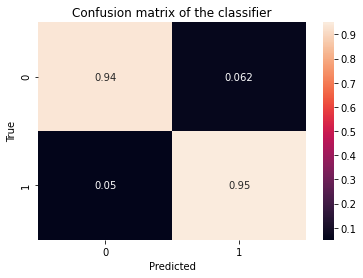

In [95]:
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
import seaborn as sns
# Evaluate your model on the testing set
Y_test_predictions = model.predict(x_test)
print("Accuracy on testing set = ", accuracy_score(y_test_encoded, Y_test_predictions))
print("RMSE on testing set = ", mean_squared_error(y_test_encoded, Y_test_predictions)**0.5)

# Plot a confusion matrix
cm = confusion_matrix(y_test_encoded, Y_test_predictions, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [96]:
data_score2 = trainX
data_score2['Score'] = trainX['Score'].apply(lambda x: 2 if x==2 else 0)
data_score2 = data_score2[~(data_score2['Summary_Embeddings'].apply(lambda x: all(v == 0 for v in x)))]
data_score2 = data_score2[~(data_score2['Text_Embeddings'].apply(lambda x: all(v == 0 for v in x)))]

In [97]:
summary_embeddings = np.vstack(data_score2['Summary_Embeddings'].values)
text_embeddings = np.vstack(data_score2['Text_Embeddings'].values)

# # Concatenate the 2D arrays
X = np.concatenate([summary_embeddings, text_embeddings], axis=1)
y = data_score2['Score'].apply(lambda x: int(x))

In [98]:
data_score2.head(20)

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,Score,Helpfulness,ReviewLength,Text_Embeddings,Summary_Embeddings
0,195370,1890228583,A3VLX5Z090RQ0V,1,2,1030838400,unexplained anime review,anxious see uncut version kite called finally ...,2,0.500000,234,"[-0.12357161, 0.08572641, -0.13271326, -0.0624...","[-0.36291003, -0.06073999, -0.194, -0.12302334..."
1,1632470,B00BEIYSL4,AUDXDMFM49NGY,0,1,1405036800,great,movie okay great,0,0.000000,4,"[-0.077345334, 0.013289015, -0.12594034, -0.16...","[-0.093846, 0.58296, -0.019271, -0.070072, 0.1..."
2,9771,0767809335,A3LFIA97BUU5IE,3,36,983750400,technical problem dvd,like dinosaur collector edition dvd one wo pla...,0,0.083333,26,"[0.0117825, 0.030195307, -0.07427306, -0.07504...","[-0.2628233, 0.07638634, 0.024054006, -0.17563..."
4,936225,B000B5XOZW,ANM2SCEUL3WL1,1,1,1163721600,herzog great traveler natural human landscape,always great admirer herzog oeuvre traveling o...,0,1.000000,277,"[0.024255792759491593, 0.10209307666133408, -0...","[-0.020772666, 0.19982117, -0.034848165, -0.20..."
5,1335796,B003BJODIC,A2J6LGGTPXTBJV,0,0,1356739200,love shaun,yr old grandson huge shaun sheep fan shaun si...,0,0.000000,25,"[0.06519606736089502, 0.06225185761494296, -0....","[0.326735, 0.42725998, -0.324585, -0.24421, -0..."
6,1213850,B001L8YQ64,A2OFSDJB3MVQ16,2,6,1245024000,disappointing night,saw film recently showtime based fact john mal...,2,0.333333,173,"[-0.04270083801529836, 0.11615261301631108, -0...","[0.09009499, 0.18198, 0.23908, 0.1595035, -0.1..."
7,440815,6304953585,ABDAHMRYSMMIV,7,8,1137628800,rather stunning restored whole first spaceship,ever seen one hacked cheap issue orson welles ...,0,0.875000,313,"[-0.04648438231182612, 0.003637208784238209, 0...","[0.20566267, -0.0539325, -0.0391915, -0.022338..."
8,159598,079394144X,A1BE6OK9R2JFJJ,0,1,1306108800,excellence,one favorite play adapted author excellent per...,0,0.000000,29,"[-0.07913306, 0.19307406, -0.053122766, -0.148...","[-0.09539, 0.28024, 0.72171, -0.61528, 0.40147..."
9,202165,6300182738,A11PTCZ2FM2547,13,37,1104537600,reluctant four star,following first viewing movie angry filmmaker ...,0,0.351351,452,"[-0.07404866916751549, 0.04509123401789299, 0....","[0.20956235, -0.008111998, -0.016764954, 0.059..."
10,1043816,B000M5KBJS,A3LHHW6WRRXEDJ,2,3,1182211200,ok,ok metal cheese factor got vhs came wondering...,0,0.666667,58,"[-0.18106197, 0.22297104, -0.10423822, -0.0941...","[-0.13199, 0.15186, -0.65313, -0.42774, -0.020..."


In [130]:
over = SMOTE(sampling_strategy=0.3)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

In [131]:
X_resampled, y_resampled = pipeline.fit_resample(X, y)

In [132]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [102]:
label_encoder_2 = LabelEncoder()
y_train_encoded = label_encoder_2.fit_transform(y_train)
y_test_encoded = label_encoder_2.transform(y_test)

In [103]:
model_2 = XGBClassifier()
model_2.fit(x_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Accuracy on testing set =  0.8936431900569654
RMSE on testing set =  0.3261239180787492


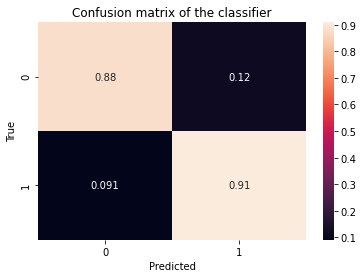

In [104]:
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
import seaborn as sns
# Evaluate your model on the testing set
Y_test_predictions = model_2.predict(x_test)
print("Accuracy on testing set = ", accuracy_score(y_test_encoded, Y_test_predictions))
print("RMSE on testing set = ", mean_squared_error(y_test_encoded, Y_test_predictions)**0.5)

# Plot a confusion matrix
cm = confusion_matrix(label_encoder_2.inverse_transform(y_test_encoded), label_encoder_2.inverse_transform(Y_test_predictions), normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [247]:
import pickle
filename = 'model_2.pkl'
with open(filename, 'wb') as f:
    pickle.dump(model_2, f)

In [106]:
Y_test_predictions = model_2.predict(x_test)
print(Y_test_predictions)
print(label_encoder_2.inverse_transform(Y_test_predictions))

[0 1 1 ... 1 0 0]
[0 2 2 ... 2 0 0]


In [113]:
trainX.head()

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,Score,Helpfulness,ReviewLength,Text_Embeddings,Summary_Embeddings
0,195370,1890228583,A3VLX5Z090RQ0V,1,2,1030838400,unexplained anime review,anxious see uncut version kite called finally ...,0,0.500000,234,"[-0.12357161, 0.08572641, -0.13271326, -0.0624...","[-0.36291003, -0.06073999, -0.194, -0.12302334..."
1,1632470,B00BEIYSL4,AUDXDMFM49NGY,0,1,1405036800,great,movie okay great,0,0.000000,4,"[-0.077345334, 0.013289015, -0.12594034, -0.16...","[-0.093846, 0.58296, -0.019271, -0.070072, 0.1..."
2,9771,0767809335,A3LFIA97BUU5IE,3,36,983750400,technical problem dvd,like dinosaur collector edition dvd one wo pla...,0,0.083333,26,"[0.0117825, 0.030195307, -0.07427306, -0.07504...","[-0.2628233, 0.07638634, 0.024054006, -0.17563..."
3,218855,6300215792,A1QZM75342ZQVQ,1,1,1394841600,heeeeyyyyy laaaaadeee,come far best jerry lewis movie made full com...,0,1.000000,157,"[-0.1360563, 0.06709386, -0.087700106, -0.0409...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,936225,B000B5XOZW,ANM2SCEUL3WL1,1,1,1163721600,herzog great traveler natural human landscape,always great admirer herzog oeuvre traveling o...,0,1.000000,277,"[0.024255792759491593, 0.10209307666133408, -0...","[-0.020772666, 0.19982117, -0.034848165, -0.20..."


In [122]:
data_score3 = trainX
data_score3['Score'] = trainX['Score'].apply(lambda x: 3 if x==3 else 0)
data_score3 = data_score3[~(data_score3['Summary_Embeddings'].apply(lambda x: all(v == 0 for v in x)))]
data_score3 = data_score3[~(data_score3['Text_Embeddings'].apply(lambda x: all(v == 0 for v in x)))]

In [123]:
summary_embeddings = np.vstack(data_score3['Summary_Embeddings'].values)
text_embeddings = np.vstack(data_score3['Text_Embeddings'].values)

# # Concatenate the 2D arrays
X = np.concatenate([summary_embeddings, text_embeddings], axis=1)
y = data_score3['Score'].apply(lambda x: int(x))

In [139]:
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

In [140]:
X_resampled, y_resampled = pipeline.fit_resample(X, y)

In [141]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [142]:
label_encoder_3 = LabelEncoder()
y_train_encoded = label_encoder_3.fit_transform(y_train)
y_test_encoded = label_encoder_3.transform(y_test)

In [143]:
model_3 = XGBClassifier()
model_3.fit(x_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Accuracy on testing set =  0.8438597036254621
RMSE on testing set =  0.3951459178259822


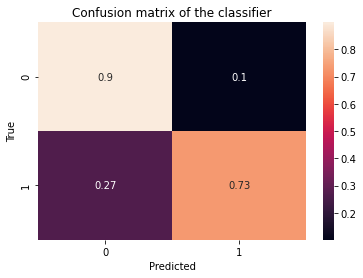

In [144]:
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
import seaborn as sns
# Evaluate your model on the testing set
Y_test_predictions = model_3.predict(x_test)
print("Accuracy on testing set = ", accuracy_score(y_test_encoded, Y_test_predictions))
print("RMSE on testing set = ", mean_squared_error(y_test_encoded, Y_test_predictions)**0.5)

# Plot a confusion matrix
cm = confusion_matrix(label_encoder_3.inverse_transform(y_test_encoded), label_encoder_3.inverse_transform(Y_test_predictions), normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [248]:
import pickle
filename = 'model_3.pkl'
with open(filename, 'wb') as f:
    pickle.dump(model_3, f)

In [145]:
trainX.head()

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,Score,Helpfulness,ReviewLength,Text_Embeddings,Summary_Embeddings
0,195370,1890228583,A3VLX5Z090RQ0V,1,2,1030838400,unexplained anime review,anxious see uncut version kite called finally ...,0,0.500000,234,"[-0.12357161, 0.08572641, -0.13271326, -0.0624...","[-0.36291003, -0.06073999, -0.194, -0.12302334..."
1,1632470,B00BEIYSL4,AUDXDMFM49NGY,0,1,1405036800,great,movie okay great,3,0.000000,4,"[-0.077345334, 0.013289015, -0.12594034, -0.16...","[-0.093846, 0.58296, -0.019271, -0.070072, 0.1..."
2,9771,0767809335,A3LFIA97BUU5IE,3,36,983750400,technical problem dvd,like dinosaur collector edition dvd one wo pla...,0,0.083333,26,"[0.0117825, 0.030195307, -0.07427306, -0.07504...","[-0.2628233, 0.07638634, 0.024054006, -0.17563..."
3,218855,6300215792,A1QZM75342ZQVQ,1,1,1394841600,heeeeyyyyy laaaaadeee,come far best jerry lewis movie made full com...,0,1.000000,157,"[-0.1360563, 0.06709386, -0.087700106, -0.0409...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,936225,B000B5XOZW,ANM2SCEUL3WL1,1,1,1163721600,herzog great traveler natural human landscape,always great admirer herzog oeuvre traveling o...,0,1.000000,277,"[0.024255792759491593, 0.10209307666133408, -0...","[-0.020772666, 0.19982117, -0.034848165, -0.20..."


In [154]:
data_score4 = trainX.copy()
data_score4['Score'] = trainX['Score'].apply(lambda x: 4 if x==4 else 0)
data_score4 = data_score4[~(data_score4['Summary_Embeddings'].apply(lambda x: all(v == 0 for v in x)))]
data_score4 = data_score4[~(data_score4['Text_Embeddings'].apply(lambda x: all(v == 0 for v in x)))]

In [155]:
data_score4.head()

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,Score,Helpfulness,ReviewLength,Text_Embeddings,Summary_Embeddings
0,195370,1890228583,A3VLX5Z090RQ0V,1,2,1030838400,unexplained anime review,anxious see uncut version kite called finally ...,0,0.500000,234,"[-0.12357161, 0.08572641, -0.13271326, -0.0624...","[-0.36291003, -0.06073999, -0.194, -0.12302334..."
1,1632470,B00BEIYSL4,AUDXDMFM49NGY,0,1,1405036800,great,movie okay great,0,0.000000,4,"[-0.077345334, 0.013289015, -0.12594034, -0.16...","[-0.093846, 0.58296, -0.019271, -0.070072, 0.1..."
2,9771,0767809335,A3LFIA97BUU5IE,3,36,983750400,technical problem dvd,like dinosaur collector edition dvd one wo pla...,0,0.083333,26,"[0.0117825, 0.030195307, -0.07427306, -0.07504...","[-0.2628233, 0.07638634, 0.024054006, -0.17563..."
4,936225,B000B5XOZW,ANM2SCEUL3WL1,1,1,1163721600,herzog great traveler natural human landscape,always great admirer herzog oeuvre traveling o...,4,1.000000,277,"[0.024255792759491593, 0.10209307666133408, -0...","[-0.020772666, 0.19982117, -0.034848165, -0.20..."
5,1335796,B003BJODIC,A2J6LGGTPXTBJV,0,0,1356739200,love shaun,yr old grandson huge shaun sheep fan shaun si...,0,0.000000,25,"[0.06519606736089502, 0.06225185761494296, -0....","[0.326735, 0.42725998, -0.324585, -0.24421, -0..."


In [178]:
summary_embeddings = np.vstack(data_score4['Summary_Embeddings'].values)
text_embeddings = np.vstack(data_score4['Text_Embeddings'].values)

# # Concatenate the 2D arrays
X = np.concatenate([summary_embeddings, text_embeddings], axis=1)
y = data_score4['Score'].apply(lambda x: int(x))

In [196]:
over = SMOTE(sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline4 = Pipeline(steps=steps)

In [197]:
X_resampled, y_resampled = pipeline4.fit_resample(X, y)

In [198]:
y_resampled.value_counts()

Score
0    94013
4    75211
Name: count, dtype: int64

In [199]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [200]:
label_encoder_4 = LabelEncoder()
y_train_encoded = label_encoder_4.fit_transform(y_train)
y_test_encoded = label_encoder_4.transform(y_test)

In [201]:
model_4 = XGBClassifier()
model_4.fit(x_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Accuracy on testing set =  0.7548530063524893
RMSE on testing set =  0.49512321057238945


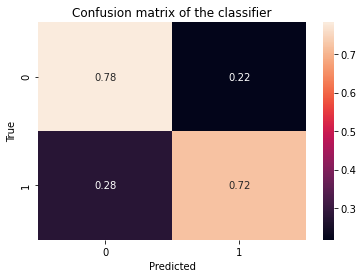

In [221]:
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
import seaborn as sns
# Evaluate your model on the testing set
Y_test_predictions = model_4.predict(x_test)
print("Accuracy on testing set = ", accuracy_score(y_test_encoded, Y_test_predictions))
print("RMSE on testing set = ", mean_squared_error(y_test_encoded, Y_test_predictions)**0.5)

# Plot a confusion matrix
cm = confusion_matrix(label_encoder_4.inverse_transform(y_test_encoded), label_encoder_4.inverse_transform(Y_test_predictions), normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [249]:
import pickle
filename = 'model_4.pkl'
with open(filename, 'wb') as f:
    pickle.dump(model_4, f)

In [222]:
data_score5 = trainX.copy()
data_score5['Score'] = trainX['Score'].apply(lambda x: 5 if x==5 else 0)
data_score5 = data_score5[~(data_score5['Summary_Embeddings'].apply(lambda x: all(v == 0 for v in x)))]
data_score5 = data_score5[~(data_score5['Text_Embeddings'].apply(lambda x: all(v == 0 for v in x)))]

In [223]:
data_score5['Summary_Embeddings'].shape

(121705,)

In [224]:
summary_embeddings = np.vstack(data_score5['Summary_Embeddings'].values)
text_embeddings = np.vstack(data_score5['Text_Embeddings'].values)

# # Concatenate the 2D arrays
X = np.concatenate([summary_embeddings, text_embeddings], axis=1)
y = data_score5['Score'].apply(lambda x: int(x))

In [234]:
y.value_counts()

Score
5    65025
0    56680
Name: count, dtype: int64

In [235]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [236]:
label_encoder_5 = LabelEncoder()
y_train_encoded = label_encoder_5.fit_transform(y_train)
y_test_encoded = label_encoder_5.transform(y_test)

In [237]:
model_5 = XGBClassifier()
model_5.fit(x_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Accuracy on testing set =  0.749106445914301
RMSE on testing set =  0.5008927570705121


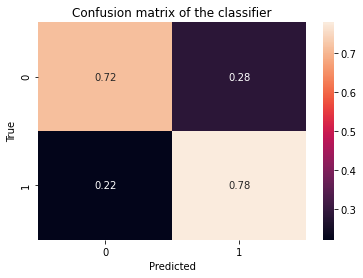

In [238]:
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
import seaborn as sns
# Evaluate your model on the testing set
Y_test_predictions = model_5.predict(x_test)
print("Accuracy on testing set = ", accuracy_score(y_test_encoded, Y_test_predictions))
print("RMSE on testing set = ", mean_squared_error(y_test_encoded, Y_test_predictions)**0.5)

# Plot a confusion matrix
cm = confusion_matrix(label_encoder_5.inverse_transform(y_test_encoded), label_encoder_5.inverse_transform(Y_test_predictions), normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [250]:
import pickle
filename = 'model_5.pkl'
with open(filename, 'wb') as f:
    pickle.dump(model_5, f)

In [251]:
summary_embeddings = np.vstack(trainX['Summary_Embeddings'].values)
text_embeddings = np.vstack(trainX['Text_Embeddings'].values)

# # Concatenate the 2D arrays
X = np.concatenate([summary_embeddings, text_embeddings], axis=1)
y = trainX['Score'].apply(lambda x: int(x))

In [252]:
y.value_counts()

Score
5    65313
4    27818
3    14482
1     7361
2     7309
Name: count, dtype: int64

In [254]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [261]:
print(x_test)

[[-0.213405    0.010285    0.54271501 ... -0.08413633  0.11717638
  -0.07893566]
 [ 0.18435001 -0.1158645  -0.2416455  ... -0.0115682  -0.00213137
   0.02139313]
 [-0.025145    0.25156951 -0.115279   ... -0.04271606 -0.01046735
   0.04454887]
 ...
 [ 0.05579275 -0.15882024 -0.060991   ... -0.03691239  0.0380365
   0.08702358]
 [-0.040376   -0.34827748 -0.19245942 ... -0.19625486  0.02772671
   0.12094353]
 [-0.00283566 -0.18138555  0.02212145 ... -0.02783887 -0.03755866
  -0.03365341]]


In [262]:
model_1_y_pred = model.predict(x_test)
model_2_y_pred = model_2.predict(x_test)
model_3_y_pred = model_3.predict(x_test)
model_4_y_pred = model_4.predict(x_test)
model_5_y_pred = model_5.predict(x_test)

In [264]:
print(model_2_y_pred)

[0 0 0 ... 0 0 0]


In [256]:
combined_predictions = (model_1_y_pred + model_2_y_pred + model_3_y_pred + model_4_y_pred + model_5_y_pred) / 5

In [257]:
combined_predictions = [int(x) for x in combined_predictions]

In [260]:
print(len(combined_predictions))

24457


In [265]:
label_encoder_6 = LabelEncoder()
y_train_encoded = label_encoder_6.fit_transform(y_train)
y_test_encoded = label_encoder_6.transform(y_test)

Accuracy on testing set =  0.06018726744899211
RMSE on testing set =  3.3355929972912652


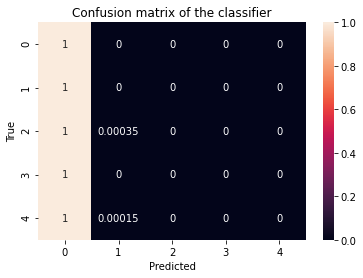

In [266]:
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
import seaborn as sns
# Evaluate your model on the testing set
# Y_test_predictions = model.predict(x_test)
print("Accuracy on testing set = ", accuracy_score(y_test_encoded, combined_predictions))
print("RMSE on testing set = ", mean_squared_error(y_test_encoded, combined_predictions)**0.5)

# Plot a confusion matrix
cm = confusion_matrix(y_test_encoded, combined_predictions, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()